<a href="https://colab.research.google.com/github/Ankit-Vishvakarma/Basics-of-Principal-Component-Analysis-PCA/blob/main/Basics_of_Principal_Component_Analysis_(_PCA_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Principal Component Analysis ( PCA )**

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('Health.csv')

X = df.iloc [:,0:3].values  # X is independent variable
y = df.iloc [:,3].values   #dependent variable

#print(X)
#print(y)
from sklearn.impute import SimpleImputer
missingValueImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import Imputer
# First create an Imputer , Stratergy means what we want to write in place of missed value
#missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean',  axis = 0)  #if missing values are represented by 9999 then write same here
# Set which columns imputer should perform
missingValueImputer = missingValueImputer.fit (X[:,1:3])
# update values of X with new values
X[:,1:3] = missingValueImputer.transform(X[:,1:3])



from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, 0] = X_labelencoder.fit_transform(X[:, 0])
#print (X)

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
#print (y)

In [ ]:
print("before PCA: ")
print(X)
pc = PCA(n_components=2)
pc.fit(X)

X_pca = pc.transform(X)
print("After doing PCA")
print(X_pca)

before PCA: 
[[2 186.0 90.0]
 [0 185.0 98.0]
 [1 175.0 80.0]
 [2 180.0 88.0]
 [1 178.0 85.25]
 [1 172.0 72.0]
 [0 178.0 75.0]
 [2 180.0 89.0]
 [0 186.0 90.0]]
After doing PCA
[[ -7.06292449   2.81250625]
 [-13.57442999  -1.65347908]
 [  7.01369106  -1.82482999]
 [ -2.40970644  -1.4409998 ]
 [  0.96762908  -1.7377904 ]
 [ 15.4664579   -0.592055  ]
 [  9.94107604   3.3027037 ]
 [ -3.28487184  -1.92093237]
 [ -7.05692131   3.0548767 ]]


In [ ]:
print("original shape:   ", X.shape)  # (9,3)
print("transformed shape:", X_pca.shape) #(9,2) when n_components =2 

original shape:    (9, 3)
transformed shape: (9, 2)


In [ ]:
#returns a vector of the variance explained by each dimension

print(pc.explained_variance_ratio_)   # # 93% data belongs to first axis and 5% data belongs to the second axis and remaining belongs to others

[0.93384643 0.05878131]


In [ ]:
df = pd.DataFrame(X_pca,columns = ['PCA1','PCA2'])
print(df)
#print(df.iloc[:,0])

        PCA1      PCA2
0  -7.062924  2.812506
1 -13.574430 -1.653479
2   7.013691 -1.824830
3  -2.409706 -1.441000
4   0.967629 -1.737790
5  15.466458 -0.592055
6   9.941076  3.302704
7  -3.284872 -1.920932
8  -7.056921  3.054877


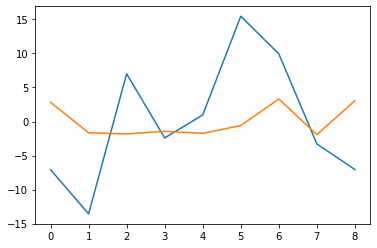

In [ ]:
plt.plot(df)
plt.show()